In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/car_price_dataset.csv')

In [3]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [7]:
df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [8]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [10]:
print("Categories in 'brand' variable:     ",end=" " )
print(df['Brand'].unique())

print("Categories in 'model' variable:  ",end=" ")
print(df['Model'].unique())

print("Categories in 'Fuel_Type' variable:",end=" " )
print(df['Fuel_Type'].unique())

print("Categories in 'Transmission' variable:     ",end=" " )
print(df['Transmission'].unique())

Categories in 'brand' variable:      ['Kia' 'Chevrolet' 'Mercedes' 'Audi' 'Volkswagen' 'Toyota' 'Honda' 'BMW'
 'Hyundai' 'Ford']
Categories in 'model' variable:   ['Rio' 'Malibu' 'GLA' 'Q5' 'Golf' 'Camry' 'Civic' 'Sportage' 'RAV4'
 '5 Series' 'CR-V' 'Elantra' 'Tiguan' 'Equinox' 'Explorer' 'A3' '3 Series'
 'Tucson' 'Passat' 'Impala' 'Corolla' 'Optima' 'Fiesta' 'A4' 'Focus'
 'E-Class' 'Sonata' 'C-Class' 'X5' 'Accord']
Categories in 'Fuel_Type' variable: ['Diesel' 'Hybrid' 'Electric' 'Petrol']
Categories in 'Transmission' variable:      ['Manual' 'Automatic' 'Semi-Automatic']


In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']

We have 4 categorical features : ['Brand', 'Model', 'Fuel_Type', 'Transmission']


In [14]:
df_num = df[numeric_features]
df_cat = df[categorical_features]

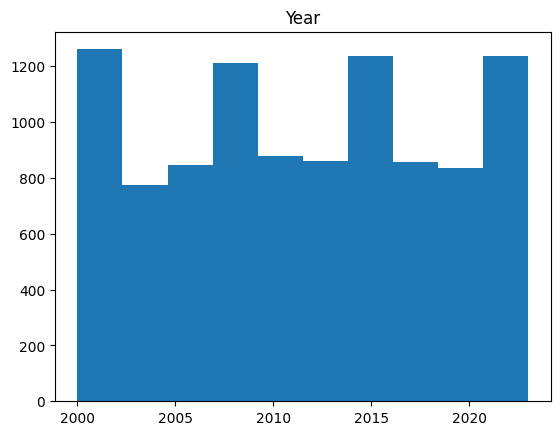

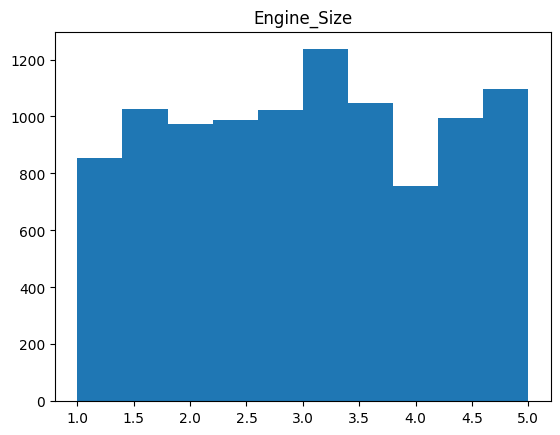

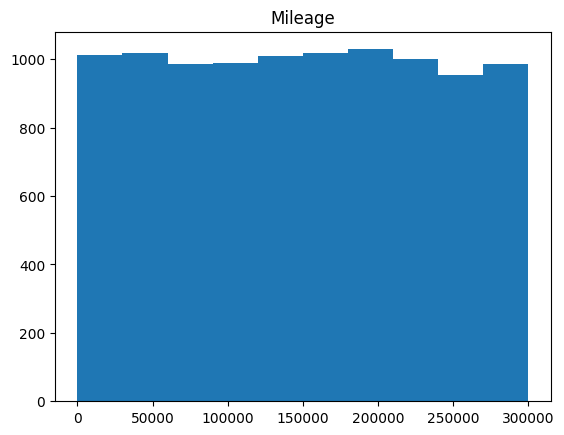

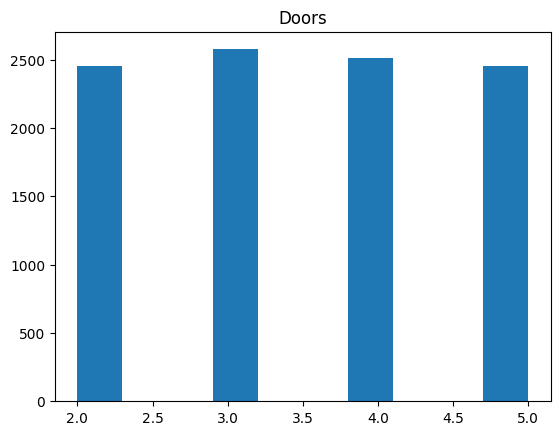

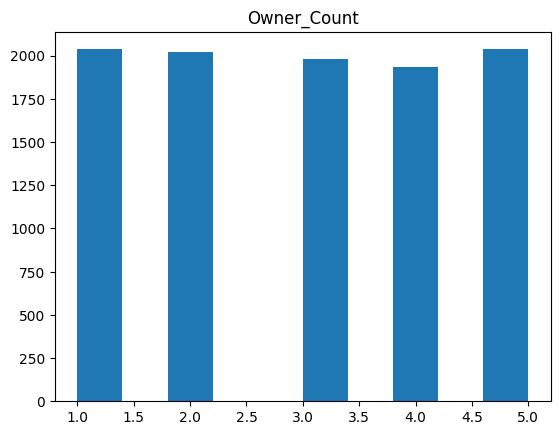

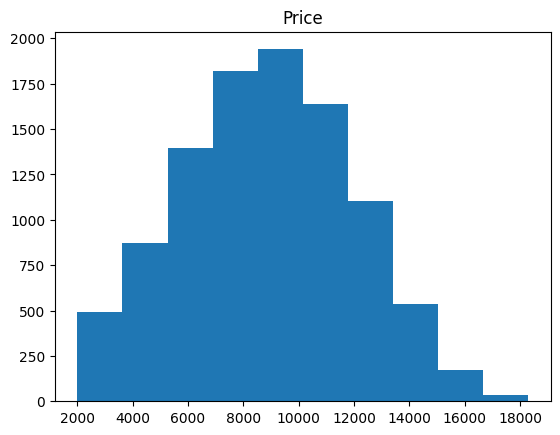

In [15]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<Axes: >

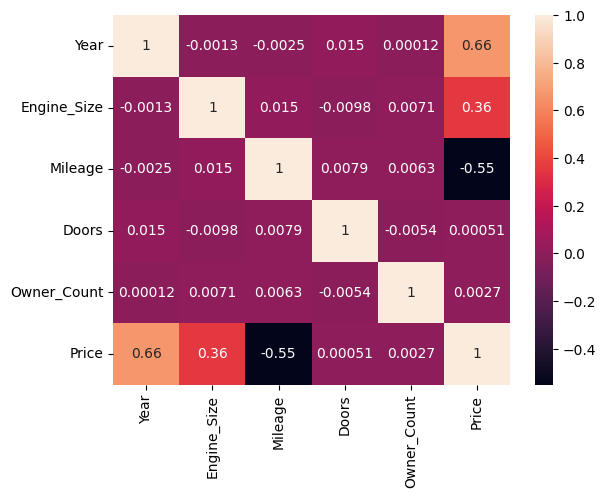

In [16]:
sns.heatmap(df_num.corr(), annot=True)

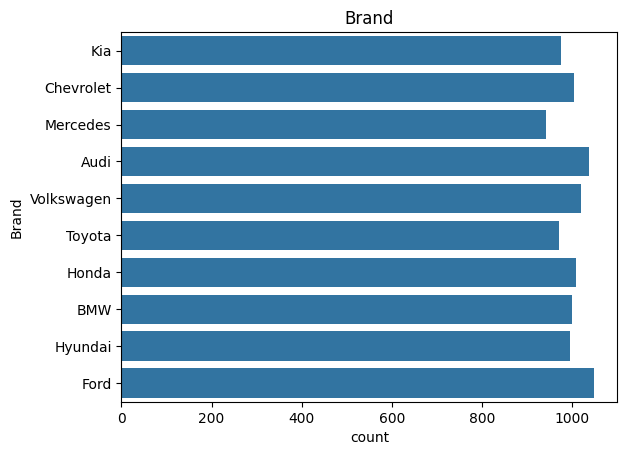

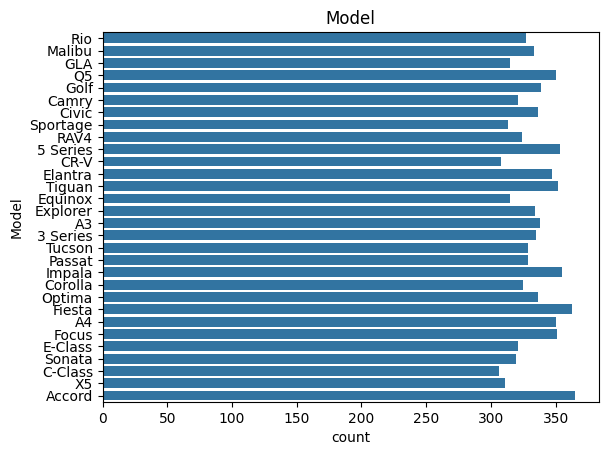

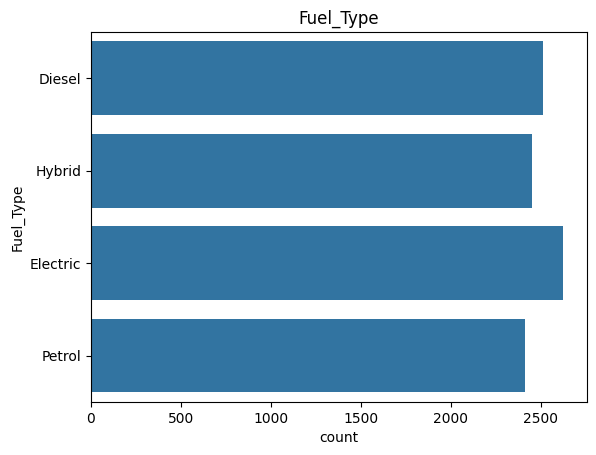

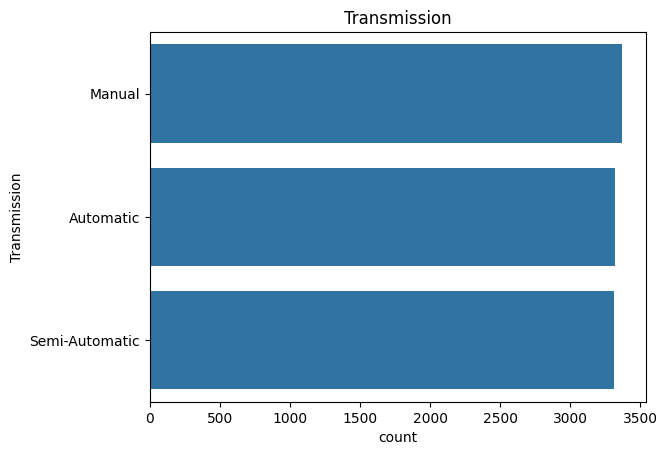

In [21]:
for i in df_cat.columns:
    sns.countplot(df_cat[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='Fuel_Type'>

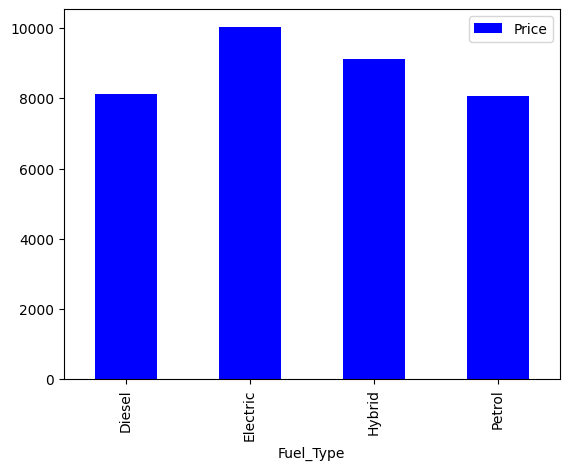

In [24]:
pd.pivot_table(df, index = 'Fuel_Type', values = 'Price').plot(kind = 'bar', color = 'blue')

<Axes: xlabel='Model'>

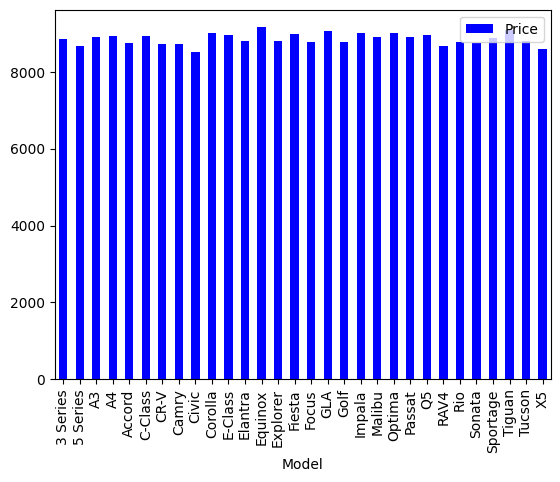

In [26]:
pd.pivot_table(df, index = 'Model', values = 'Price').plot(kind = 'bar', color = 'blue')

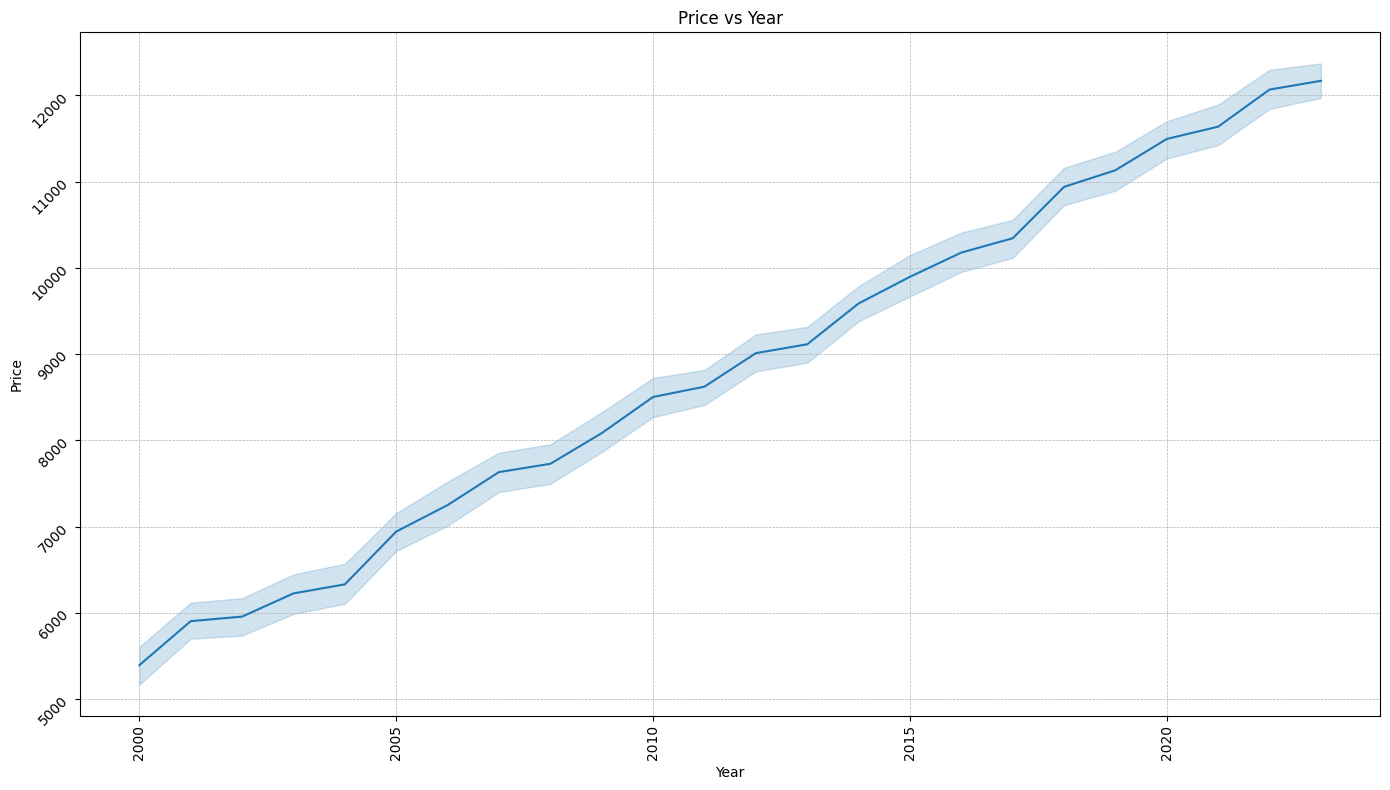

In [27]:
plt.figure(figsize=(14,8))
sns.lineplot(x='Year', y='Price', data=df)

plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')

plt.xticks(rotation=90)
plt.yticks(rotation=45)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

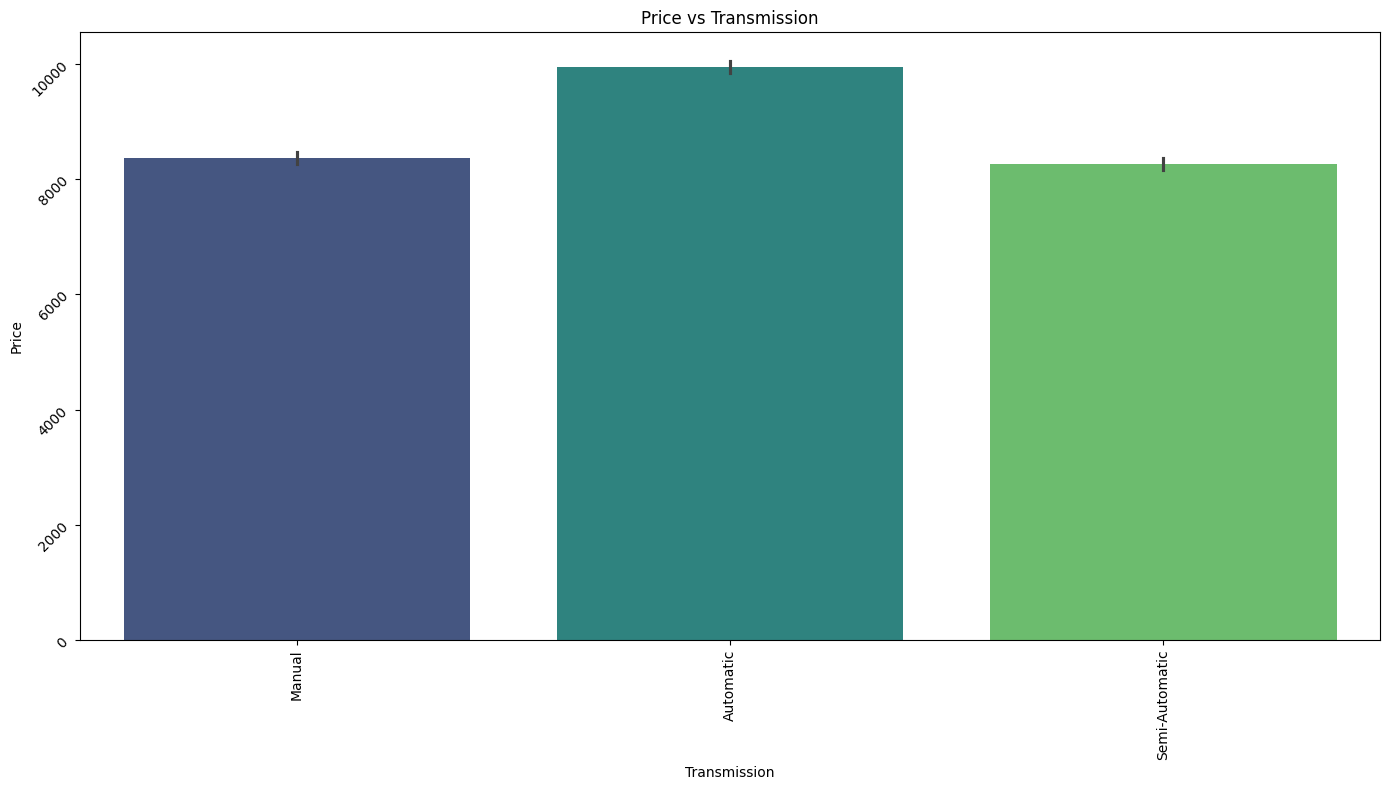

In [28]:
plt.figure(figsize=(14,8))
sns.barplot(x='Transmission', y='Price', data=df, palette='viridis')

plt.title('Price vs Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')

plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

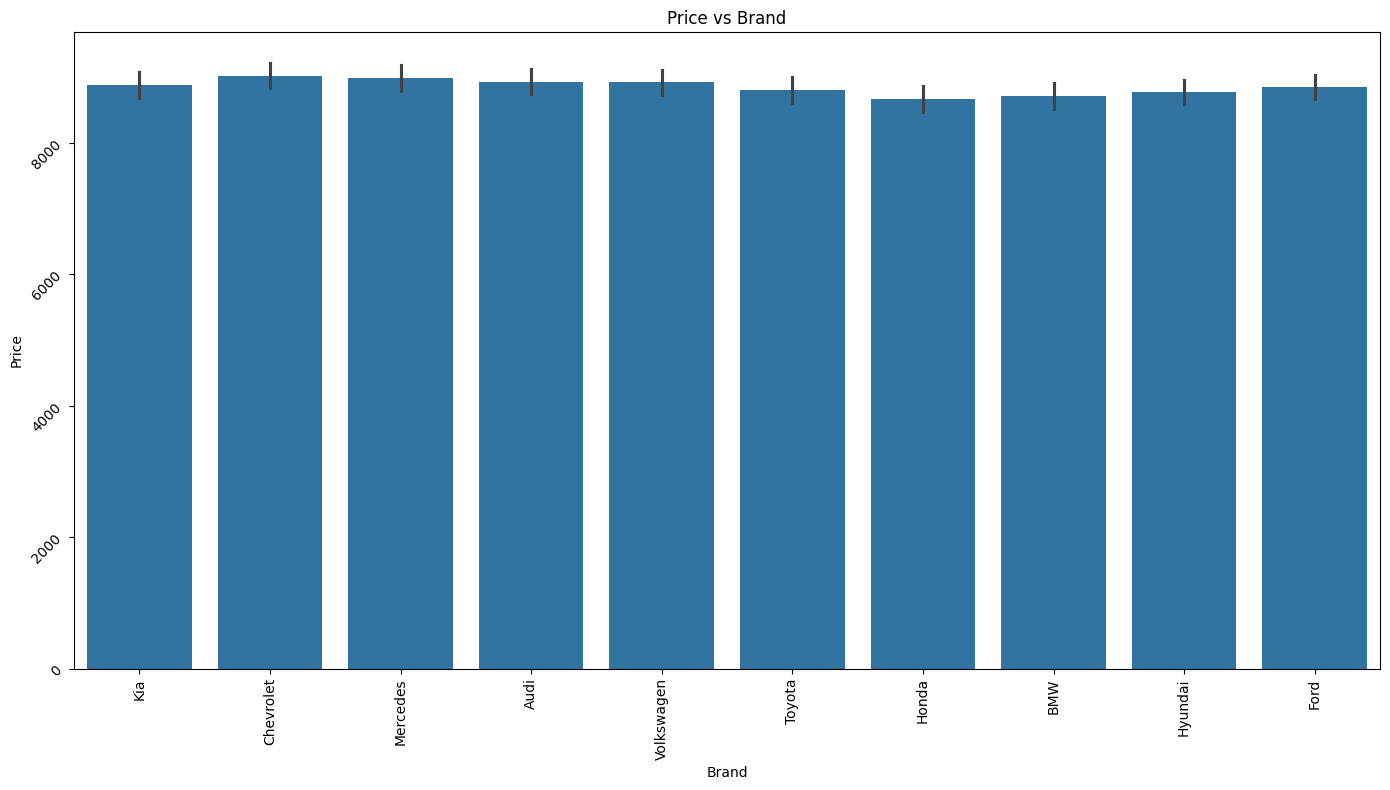

In [29]:
plt.figure(figsize=(14,8))
sns.barplot(x='Brand', y='Price', data=df)

plt.title('Price vs Brand')
plt.xlabel('Brand')
plt.ylabel('Price')

plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: ylabel='Price'>

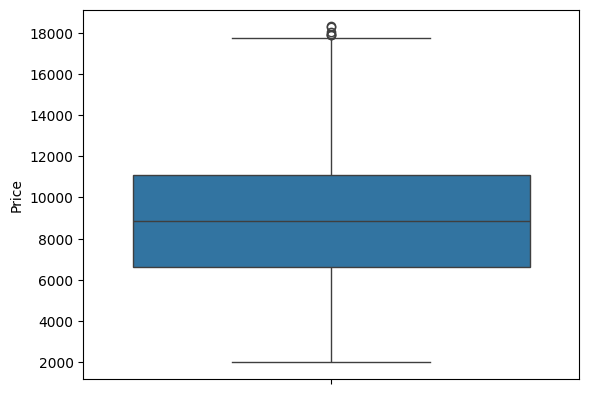

In [31]:
sns.boxplot(y='Price', data=df)

There doesn't seem to be outliers based on the boxplot above.